<a href="https://colab.research.google.com/github/AlvaroZev/CameraCalibration/blob/main/Calibracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt   # Para mostrar las imágenes
from google.colab.patches import cv2_imshow
import glob                       # Para importar los nombres de las imágenes
import cv2


In [4]:
from google.colab import files

uploaded = files.upload()



Saving imagen (1).jpg to imagen (1).jpg
Saving imagen (2).jpg to imagen (2).jpg
Saving imagen (3).jpg to imagen (3).jpg
Saving imagen (4).jpg to imagen (4).jpg
Saving imagen (5).jpg to imagen (5).jpg
Saving imagen (6).jpg to imagen (6).jpg
Saving imagen (7).jpg to imagen (7).jpg
Saving imagen (8).jpg to imagen (8).jpg
Saving imagen (9).jpg to imagen (9).jpg
Saving imagen (10).jpg to imagen (10).jpg
Saving imagen (11).jpg to imagen (11).jpg
Saving imagen (12).jpg to imagen (12).jpg
Saving imagen (13).jpg to imagen (13).jpg
Saving imagen (14).jpg to imagen (14).jpg
Saving imagen (15).jpg to imagen (15).jpg
Saving imagen (16).jpg to imagen (16).jpg
Saving imagen (17).jpg to imagen (17).jpg
Saving imagen (18).jpg to imagen (18).jpg
Saving imagen (19).jpg to imagen (19).jpg
Saving imagen (20).jpg to imagen (20).jpg
Saving imagen (21).jpg to imagen (21).jpg


In [5]:
# Lista de los nombres de las imágenes usadas para la calibración
image_names = glob.glob('./imagen*.jpg')
print(image_names)

['./imagen (10).jpg', './imagen (14).jpg', './imagen (11).jpg', './imagen (12).jpg', './imagen (8).jpg', './imagen (19).jpg', './imagen (9).jpg', './imagen (1).jpg', './imagen (7).jpg', './imagen (6).jpg', './imagen (4).jpg', './imagen (3).jpg', './imagen (15).jpg', './imagen (5).jpg', './imagen (18).jpg', './imagen (16).jpg', './imagen (13).jpg', './imagen (20).jpg', './imagen (2).jpg', './imagen (21).jpg', './imagen (17).jpg']


1. Puntos en el objeto

In [6]:
# Preparar los puntos del objeto: (0,0,0), (1,0,0), (2,0,0) ..., (7,5,0)
nx = 8; ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(nx*ny,2)

print("Primeros puntos:"); print(objp[0:3])
print("Últimos puntos:"); print(objp[-4:])

Primeros puntos:
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]]
Últimos puntos:
[[4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]]


2.Puntos en la imagen

Tamaño de la imagen: (x,y)=(640,480)


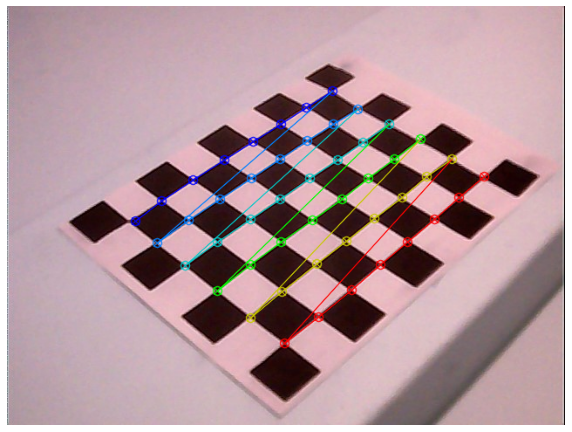

In [7]:
# Lectura de una imagen
I = cv2.imread(image_names[2])
# Tamaño de la imagen
I_size = (I.shape[1], I.shape[0])
print("Tamaño de la imagen: (x,y)=({},{})".format(I_size[0], I_size[1]))
# Conversión de la imagen a escala de grises
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Encontrar las esquinas (corners) internas del patrón. A estas esquinas se les denomina también 
# "puntos de la imagen" ("image points")
retval, corners = cv2.findChessboardCorners(Igray, (nx, ny), None)

# Si se encuentra los puntos (corners), mostrar la imagen con los puntos
if retval == True:
    # Añadir los puntos (corners) encontrados a la imagen
    cv2.drawChessboardCorners(I, (8,6), corners, retval)
    # Mostrar la imagen
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap='gray')
    plt.axis('off')
    plt.show()

Imagen con puntos esquina


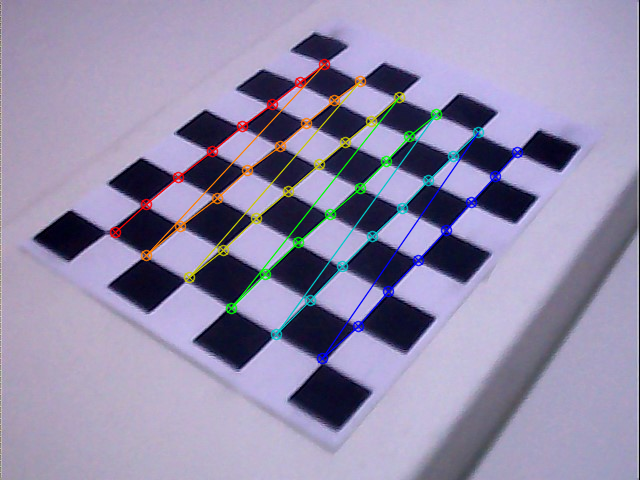

Imagen con puntos esquina


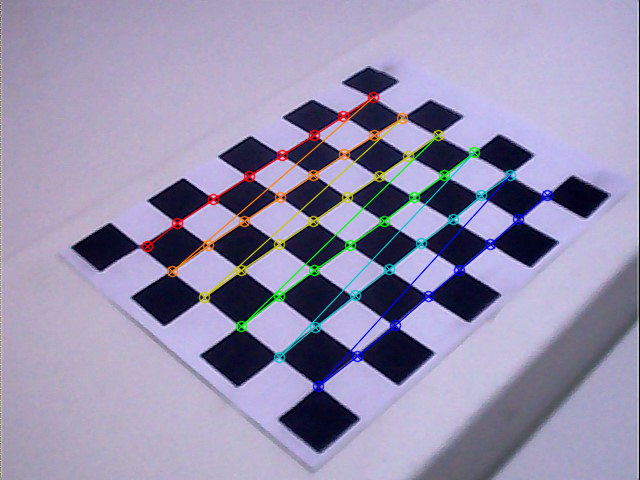

Imagen con puntos esquina


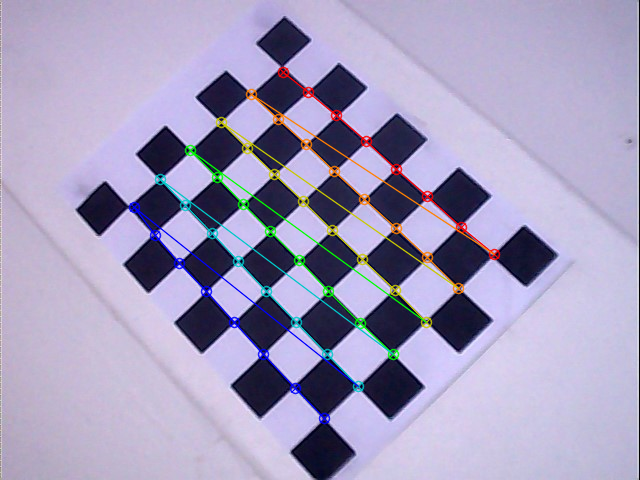

Imagen con puntos esquina


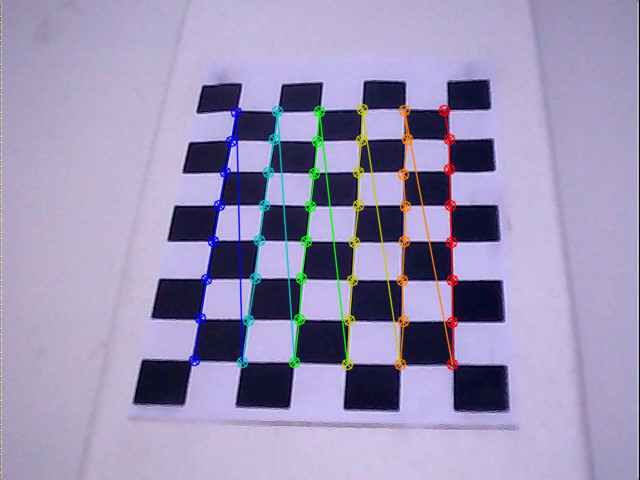

Imagen con puntos esquina


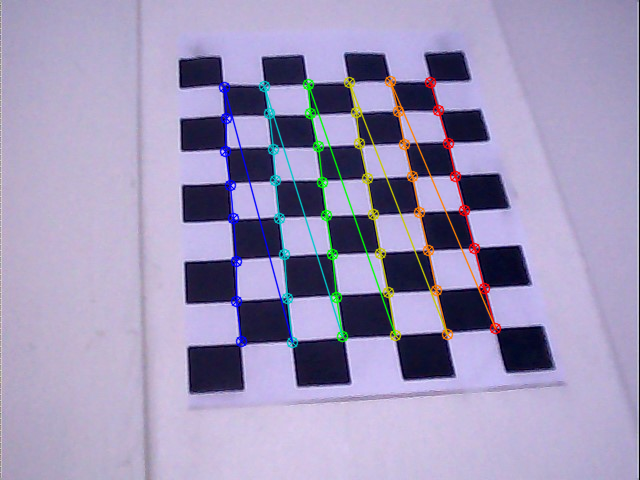

Imagen con puntos esquina


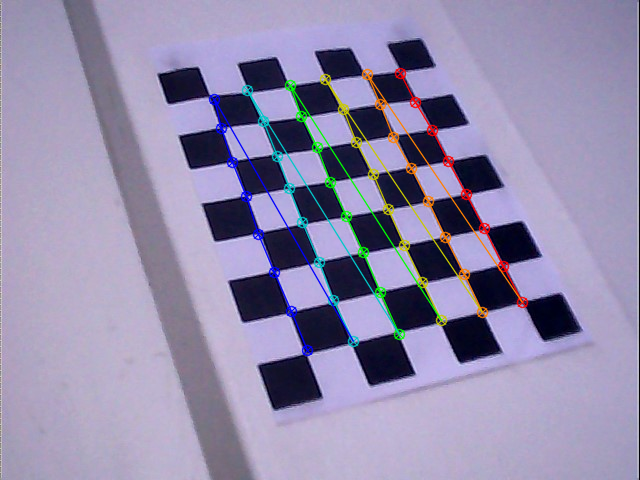

Imagen con puntos esquina


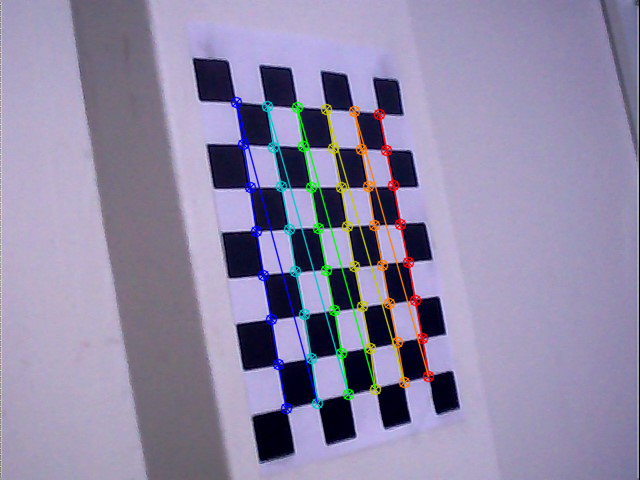

Imagen con puntos esquina


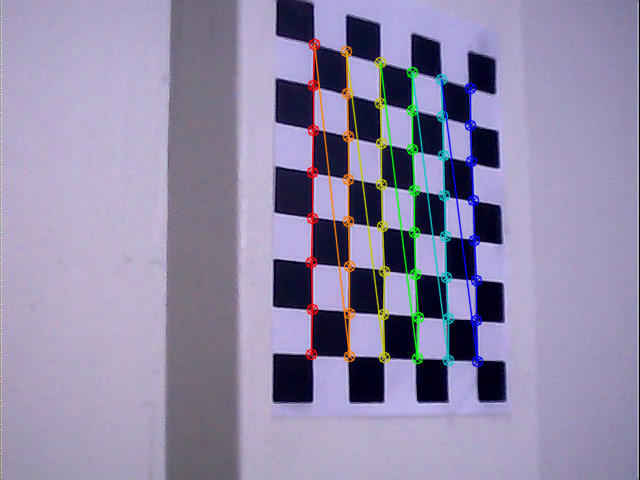

Imagen con puntos esquina


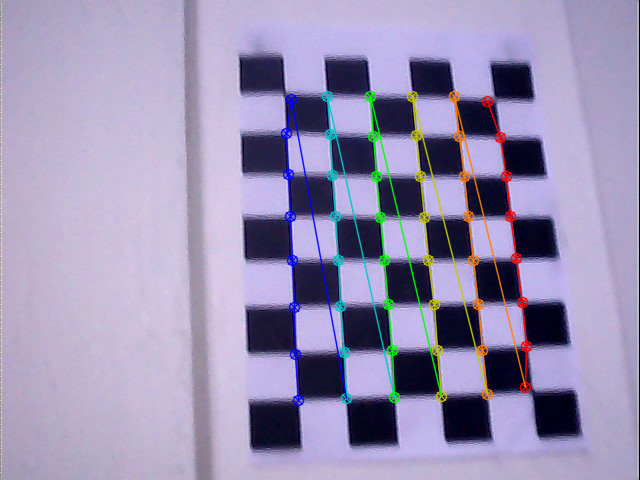

Imagen con puntos esquina


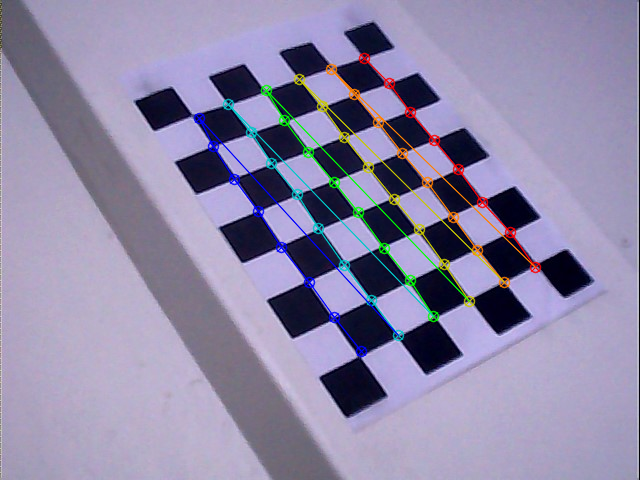

Imagen con puntos esquina


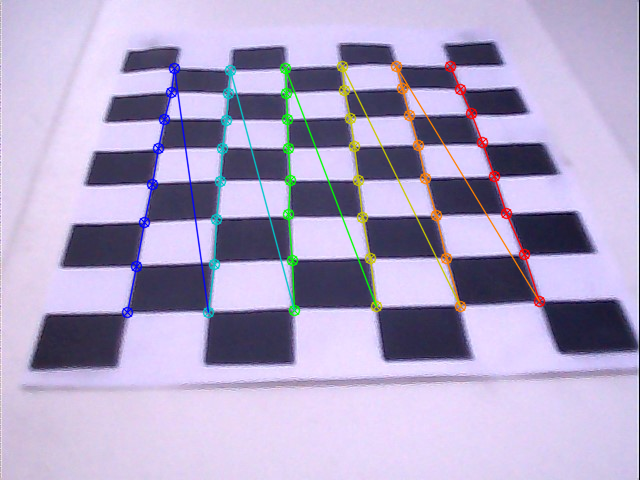

Imagen con puntos esquina


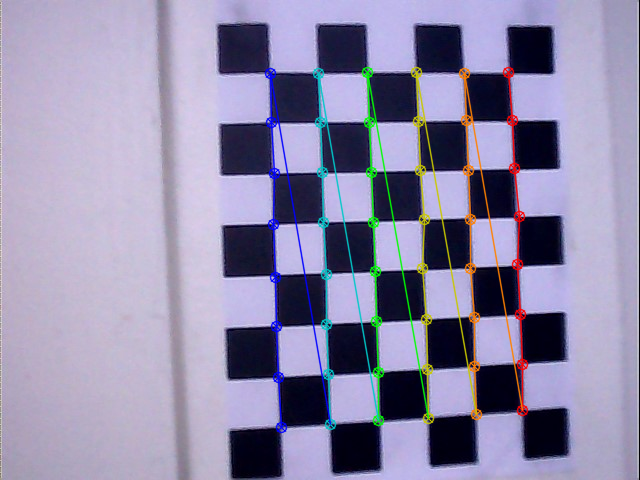

Imagen con puntos esquina


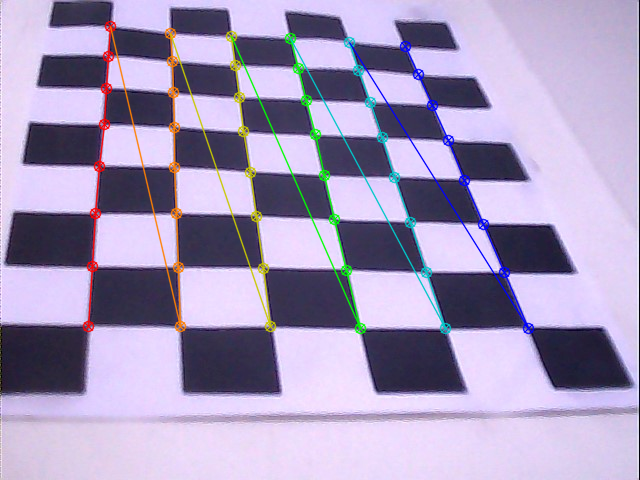

Imagen con puntos esquina


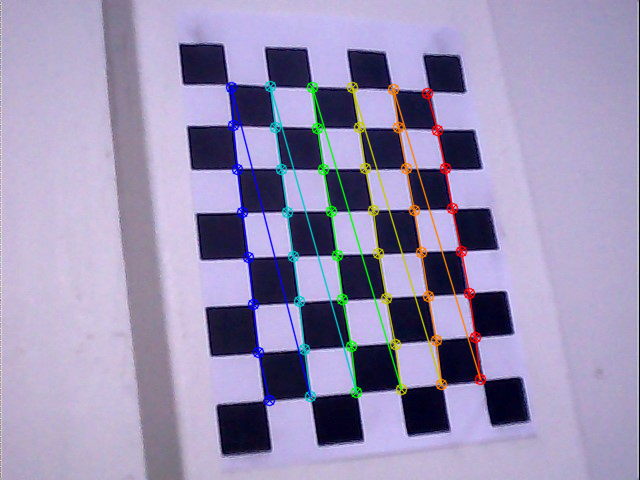

Imagen con puntos esquina


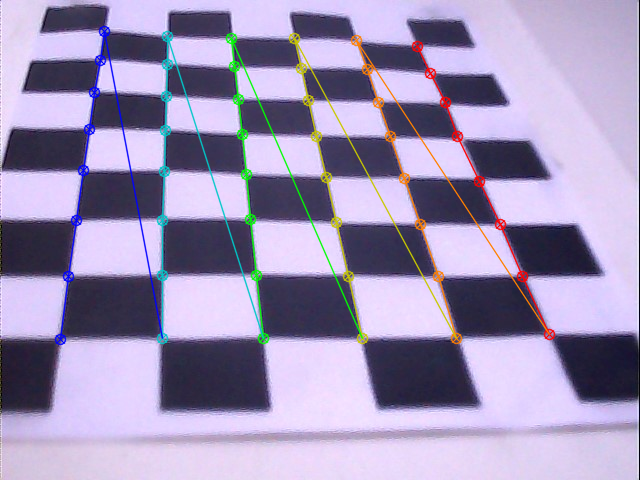

Imagen con puntos esquina


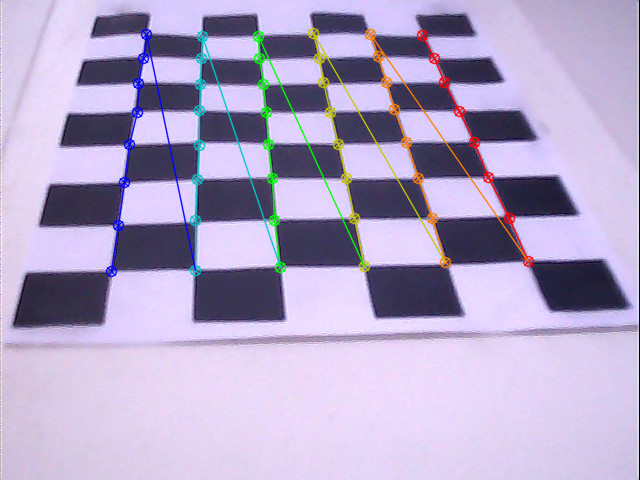

In [8]:
# Listas que almacenan los puntos del objeto (índices) y los puntos de la imagen (corners)
# para todas las imágenes
obj_points = []     # Puntos del objeto (3d)
img_points = []     # Puntos de la imagen (2d)

# Bucle a lo largo de todas las imágenes, buscando las "esquinas" (corners)
for idx, iname in enumerate(image_names):
    # Leer la imagen
    I = cv2.imread(iname)
    # Convertir a escala de grises
    Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

    # Encontrar las esquinas (corners) internas del patrón
    retval, corners = cv2.findChessboardCorners(Igray, (nx,ny), None)

    # Si se encuentra los puntos, añadirlos a la lista
    if retval == True:
        # Puntos del objeto y puntos de la imagen, para la imagen actual
        obj_points.append(objp)
        img_points.append(corners)

        # Añadir a la imagen los puntos (corners) encontrados
        cv2.drawChessboardCorners(I, (8,6), corners, retval)
        
        # Si se desea grabar las imágenes con sus "corners", descomentar la siguiente línea
        # cv2.imwrite('corners'+str(idx)+'.jpg', I)
        
        # Mostrar la imagen (se puede abrir una ventana adicional)
        print('Imagen con puntos esquina')
        cv2_imshow(I)
        cv2.waitKey(500)

cv2.destroyAllWindows()

3. Calibracion de la camara

In [9]:
# Calibración de la cámara dados los puntos objeto (3D) y los puntos imágen (corners) correspondientes
retval, M, coefs_dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, I_size, None, None)
# Mostrar los los parámetros
print("Matriz de calibración:"); print(np.round(M,3))
print("\nCoeficientes de distorsión:"); print(np.round(coefs_dist,3))

Matriz de calibración:
[[983.402   0.    348.039]
 [  0.    989.81  242.036]
 [  0.      0.      1.   ]]

Coeficientes de distorsión:
[[-3.390e-01 -2.681e+00 -3.000e-03  9.000e-03  3.544e+01]]


In [10]:
# Grabar los valores usando pickle
import pickle

# Estructura para almacenar parámetros calibrados
dist_pickle = {}
dist_pickle["M"] = M
dist_pickle["coefs_dist"] = coefs_dist

# Almacenar los parámetros de la cámara
pickle.dump(dist_pickle, open("camera_params.p", "wb"))

4. Aplicación de la Calibración a una Imagen

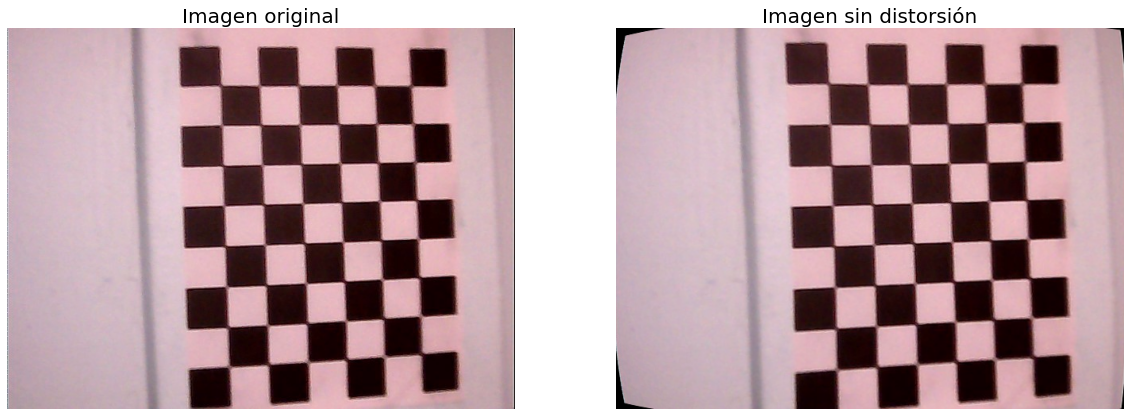

In [13]:
# Imagen de entrada
Iorig = cv2.imread(image_names[15])

# Corregir la distorsión
Iundist = cv2.undistort(Iorig, M, coefs_dist, None)

# Visualize undistortion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(Iorig)
ax1.set_title('Imagen original', fontsize=20); ax1.axis('off')
ax2.imshow(Iundist)
ax2.set_title('Imagen sin distorsión', fontsize=20); ax2.axis('off');